# Assignment 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 3.7
We turn to the first central-difference approximation to the second derivative.

(a) Start with the error analysis, including both approximation and roundoff error.
Derive expressions for the $h_{opt}$ and the $\varepsilon_{opt}$. Then, produce numerical estimates
for $h_{opt}$ and the $\varepsilon_{opt}$. Compare these results to those for the first derivative.

### **Error Analysis**

**Solution:** The first central-difference approximation to the second derivative can be calculated as,

\begin{align}
f''(x) \approx \frac{f(x+h)-2f(x)+f(x-h)}{h^2}
\end{align}

Now the error will consisnt of two parts -- approximationand roundoff error. The approximation error can be found using the Taylor series expansion,

\begin{align}
f''(x\pm h) = f(x) \pm hf'(x) + \frac{h^2}{2}f''(x)\pm \frac{h^3}{6}f'''(x)+...
\end{align}

Substituting these expansions into the first equation, the odd powers and $f(x)$ will cancel out, giving us,

\begin{align}
f''(x) &= h^2 f''(x) + \frac{h^4}{12h^2}f^{(4)}(x) +...\\
&= f''(x) + \frac{h^2}{48}f^{(4)}(x) + O(h^4)\\
\implies \varepsilon_{approx} &= \frac{h^2}{48}f^{(4)}(x)
\end{align}

Now, the round-off error can be calculated as,
\begin{align}
\varepsilon_{ro} = \frac{4}{h^2}4\epsilon_m |f(x)| = \frac{16\epsilon_m |f(x)|}{h^2}
\end{align}

where $\epsilon_m$ is the machine-precision. Hence, the total error would be,

\begin{align}
\varepsilon_{total} &= \frac{h^2}{48}f^{(4)}(x) + \frac{16\epsilon_m|f(x)|}{h^2}
\end{align}



### **Finding optimal $h$ and $\varepsilon$**

**Solution:** Now, to find the optimal step-size, we need to minimize $\varepsilon_{total}$ w.r.t $h$.

\begin{align}
\frac{d\varepsilon_{total}}{dh} = \frac{h}{24}f^{(4)}(x) - \frac{32\epsilon_m |f(x)|}{h^3}=0
\end{align}

Solving for $h$, we get,

\begin{align}
h_{opt} = 4\left(\frac{3\epsilon_m|f(x)|}{f^{(4)}(x) }\right)^{1/4}
\end{align}

If we assume $f(x)$ and $f^{(4)}(x)$ to be of the same order, the optimum step-size should be of the order of $\epsilon_m^{1/4}$.

Substituting the value of $h_{opt}$ in the original equation to get $\varepsilon_{opt}$,

\begin{align}
\varepsilon_{opt} = \frac{2}{3}\sqrt{3\epsilon_m f^{(4)}(x)|f(x)|}
\end{align}

Numerically, (assuming $f(x)$ and $f^{(4)}(x)$ to be of the same order) we can estimate these values using $\epsilon_m \sim 10^{-16}$ for double precision which means,

\begin{align}
h_{opt} \sim 10^{-4}\\
\varepsilon_{opt} \sim 10^{-8}
\end{align}

### **Comparison with first derivative**

**Solution:** For central-difference approximation for the first derivative,

\begin{align}
\varepsilon_{opt} = 2\sqrt{\epsilon_m |f(x)f''(x)|}\\
h_{opt} = 2\sqrt{\epsilon_m \frac{f(x)}{f''(x)}}
\end{align}

Here, $h_{opt}$ if of the order of $\sqrt{\epsilon_m}$ instead of $\epsilon_m^{1/4}$ for the second derivative case. However in both cases, the opimal error is of the order of $\sqrt{\epsilon_m}$, assuming $f(x)$ and $f^{(4)}(x)$ to be of the same order.


**(b)**  Now code this problem up in Python (for the function $f(x) = e^{\sin(2x)}$ at $x = 0.5$)
to produce both a table of numbers and a plot for the absolute error, with $h$ taking on the values $10^{-1}, 10^{-2}, 10^{-3}, ..., 10^{-10}$.


In [ ]:
def f(x):
  return np.exp(np.sin(2*x))

def second_derivative(x):
  return -4*np.exp(np.sin(2*x))*(np.sin(2*x) - (np.cos(2*x))**2)

def central_second_derivative(f, x, h):
  return (4/h**2)*(f(x+(h/2))+f(x-(h/2))-2*f(x))

In [ ]:
hs = np.array([10**i for i in range(-1, -11, -1)])
x = 0.5
ddx = second_derivative(x)
ddx_central = [np.abs(central_second_derivative(f, x, h)-ddx) for h in hs]

rowf = "| {0:1.0e} | {1:1.16f} |"
print("|   h   |     abs. error     |")
print("------------------------------")
for h, ddxi in zip(hs, ddx_central):
  print(rowf.format(h,ddxi))

|   h   |     abs. error     |
------------------------------
| 1e-01 | 0.0031888133759885 |
| 1e-02 | 0.0000316533918747 |
| 1e-03 | 0.0000003172493050 |
| 1e-04 | 0.0000001289554801 |
| 1e-05 | 0.0000004842268488 |
| 1e-06 | 0.0011373526040641 |
| 1e-07 | 0.1254823313620808 |
| 1e-08 | 5.0992814816827829 |
| 1e-09 | 5.0992814816827829 |
| 1e-10 | 5.0992814816827829 |


Text(0, 0.5, '|abs. error|')

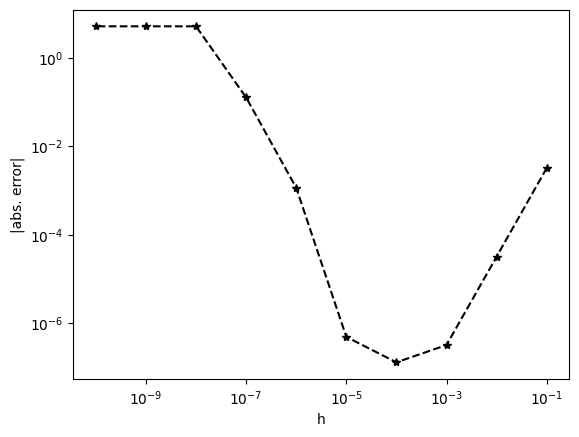

In [ ]:
plt.plot(hs, ddx_central, '*k--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('|abs. error|')

**Solution:** Here, as we can see, $h_{opt} \approx 10^{-4} = (10^{-16})^{1/4}$, which makes sense considering that $\epsilon_m \sim 10^{-16}$ for double precision. However the optimum error comes out to be around $10^{-6}$ which could be due us the approximations we took (such as equating the order of first and 4th derivative) in the estimation of $\varepsilon_{opt}$.



---


## Problem  3.10
We will see how to implement the gradient of a scalar function using Python lists:

(a) Write a Python function to compute the gradient $\nabla \phi(\text{x})$ via a forward-difference
approximation, as per Eq. (5.108). This should work for any scalar function; test
it on the $\phi(\text{x})$ of Eq. (5.106).


In [ ]:
from autograd import grad

In [ ]:
def phi(xs):
  x0, x1 = xs
  return x0**2 - 2*x0 + x1**4 - 2*x1**2 + x1

def gradient(phi, xs, h=1e-7):
  n = xs.size
  phi_0 = phi(xs)
  Xph = (xs*np.ones((n,n))).T + np.identity(n)*h
  gradn = (phi(Xph) - phi_0)/h
  return gradn

xs = np.array([2, .25])
grad_phi = grad(phi) # grad function using autograd to check our results
print('Our result     :', gradient(phi, xs))
print('Autograd result:', grad_phi(xs))
print('Absolute error :', np.abs(gradient(phi, xs)-grad_phi(xs)))

Our result     : [2.00000009 0.06249984]
Autograd result: [2.     0.0625]
Absolute error : [9.44264684e-08 1.62472404e-07]


**Solution:** Here, the gradient function uses forward-difference approximation. The error seems to be around the order of $10^{-7}$ to $10^{-8}$, for $h=10^{-7}$. This seems to be around the best possible value of $h$ for which the error is minimum (which was figured out by trying out different values of $h$ from $10^{-1}$ to $10^{-10}$).

(b) Use your new function to plot $\frac{\partial \phi}{\partial x}\frac{\partial \phi}{\partial y}$ in a format similar to that in Fig. 5.16.

In [ ]:
xh = yh = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(xh, yh)

n = X.shape[0]
Z = np.zeros(shape=(n, n))
for i in range(n):
  for j in range(n):
    x, y = X[i][j], Y[i][j]
    gradphi_x, gradphi_y = gradient(phi, np.array([x, y]))
    z = gradphi_x * gradphi_y
    Z[i][j] = z

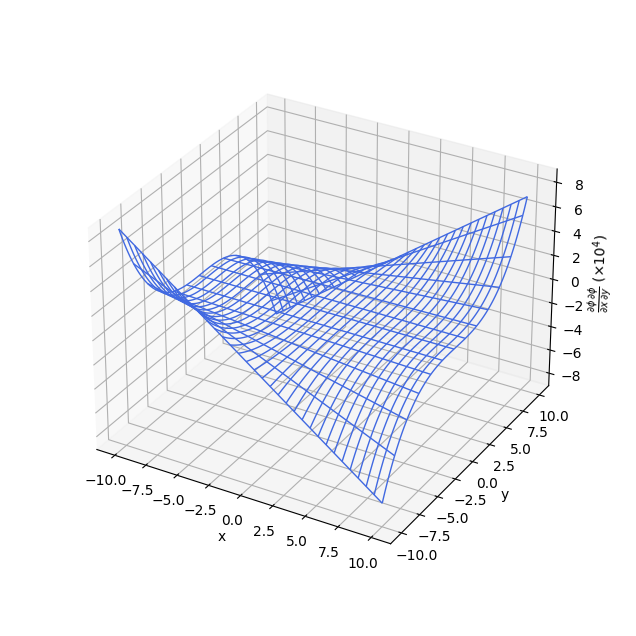

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z/1e4, edgecolor='royalblue', lw=1, rstride=8, cstride=3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(r'$\frac{\partial \phi}{\partial x}\frac{\partial \phi}{\partial y}$ ($\times 10^4$)')
ax.set_box_aspect(None, zoom=0.85)
plt.show()

---

## Problem  3.11

We turn to the relationship between Horner’s rule, Eq. (2.100), and the evaluation of
the first derivative of a polynomial. To bridge the two, introduce synthetic division:

$p(x) = (x - x_0)q(x) + p(x_0)\,\,\,\,\,...(1)$

where $p(x)$ is of degree $n - 1$ and $q(x)$ of degree $n - 2$. Show that $p'(x_0) = q(x_0)$.
Then, figure out the pattern obeyed by the coefficients of the different monomials in
$q(x)$; use it to implement a version of Horner’s rule that also computes $p'(x_0)$.

**Solution:**
Rearranging (1), we get

\begin{align}
q(x) = \frac{p(x)-p(x_0)}{x-x_0}
\end{align}

put $h = x-x_0$,

\begin{align}q(x_0) = \frac{p(x_0+h)-p(x_0)}{h}\end{align}

taking $\lim h→0$,

\begin{align}q(x_0) = \lim_{h →0} \frac{p(x_0+h)-p(x_0)}{h} = p'(x_0)\end{align}



Pattern of Coefficients in  q(x):

$$
p(x) = \sum_{i=0}^{n-1} a_i x^i
$$

$$
q(x) = \sum_{j=0}^{n-2} b_j x^j
$$
$$
p'(x) = \sum_{i=0}^{n-1}i a_i x^{i-1}=\sum_{j=0}^{n-2} b_j x^j
$$
$$=>
p'(x) = \sum_{i=-1}^{n-2}i a_{i+1} x^{i}=\sum_{j=0}^{n-2} b_j x^j
$$
 This yields, $$a_{0}=0, a_{1}=b_{0}, 2a_{2}=b_{1}, 3a_{3}=b_{2}  $$

$$q(x)=a_{1}+2a_{2}x+3a_{3}x^{2}+...$$
$$=>q(x)=a_{1}+x(2a_{2}+x(3a_{3}+...)..)$$

Another way:
$$q_i = p_{i} + x_0 \cdot q_{i-1}$$
 at any $x=x_0$

In [ ]:
# Coefficients of the form: a[0] + a[1] x^1 + a[2] x^2 + ... + a[n-1] x^(n-1)

def horner_derivative(x, coeffs):
  '''Polynomial and its derivative evaluation using Horner's rule'''
  result = 0
  dresult = 0
  for i in range(len(coeffs)-1, -1, -1):
    dresult = dresult*x + result
    result = coeffs[i] + (x * result)
  return result, dresult

In [ ]:
'''To check our results, let's use f(x) = 2x^3 - 6x^2 + 2x - 1'''
def fprime(x):
  return 6*x**2 - 12*x + 2

x = 3
coeffs = [-1, 2, -6, 2]
fx, dfx = horner_derivative(x, coeffs)
print(f'f({x}) = {fx}')
print(f'f\'({x}) = {dfx} (Using Horner\'s rule)')
print(f'f\'({x}) = {fprime(x)} (Using manual differentiation)')

f(3) = 5
f'(3) = 20 (Using Horner's rule)
f'(3) = 20 (Using manual differentiation)
